In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDAと特徴量エンジニアリング

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
mean_survival = train.Survived.mean()
mean_survival

0.3838383838383838

trainデータ全体の平均生存率が38%なので、この値を基準に特徴量の探索を行う

In [7]:
all_data = pd.concat([train,test],sort=False,ignore_index=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       891 non-null float64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


欠損値があるのはAge,Fare,Cabin,Embarked

## Pclass

Pclassはチケットのクラスで、１がファーストクラス、２がセカンド、３がサードとなっている。

In [8]:
train.groupby('Pclass').Survived.agg(['mean','size'])

,mean,size
Pclass,,
1,0.629630,216
2,0.472826,184
3,0.242363,491


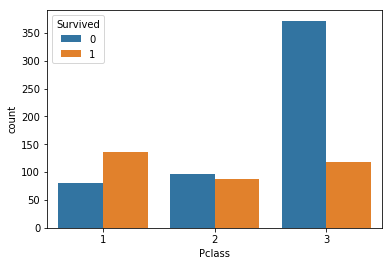

In [9]:
sns.countplot(train.Pclass,hue=train.Survived)

Pclassが小さいほど、生存率がよさそうである。  
人数はサードクラスの乗客が多いようだ。

## Sex

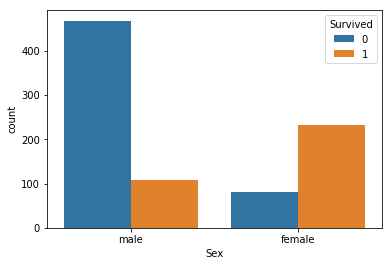

In [10]:
sns.countplot(train.Sex,hue=train.Survived)

In [11]:
train.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

男性は生存率が低く、女性は生存率が高いという傾向が見られる

## Age

C:\Users\shunsuke\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\shunsuke\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([22., 19., 15., 10., 16.,  9.,  8., 16., 39., 71., 65., 71., 82.,
        61., 65., 65., 49., 41., 42., 35., 32., 27., 33., 20., 23., 23.,
        10., 19.,  9.,  9., 13.,  9.,  8.,  2.,  0.,  5.,  0.,  1.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <a list of 50 Patch objects>)

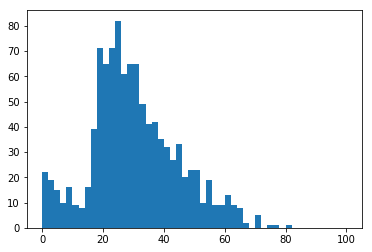

In [12]:
#train,test合わせた年齢の分布
plt.hist(all_data.Age,bins=50,range=(0,100))

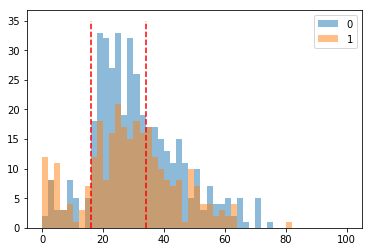

In [13]:
plt.hist(train.Age[train.Survived==0],alpha=0.5,label=0,bins=50,range=(0,100))
plt.hist(train.Age[train.Survived==1],alpha=0.5,label=1,bins=50,range=(0,100))
plt.legend()
plt.vlines([16,34],0,35,colors='r',linestyles='dashed')

0-10歳は生存率が高く、20-30歳は生存率が低い

欠損値の穴埋めは後でNameの情報を使って行う

## SibSp Parch

SibSpは同乗している兄弟か配偶者の数  
Parchは同乗している親か子どもの数

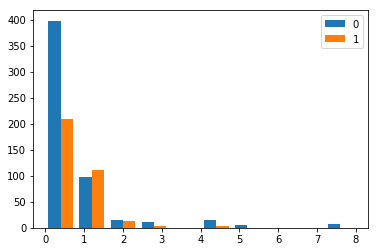

In [14]:
plt.hist([train.SibSp[train.Survived==0],train.SibSp[train.Survived==1]],label=[0,1])
plt.legend()

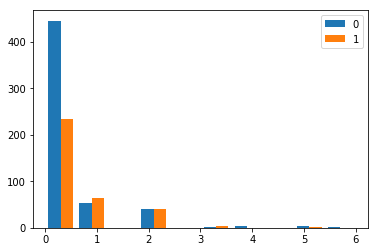

In [15]:
plt.hist([train.Parch[train.Survived==0],train.Parch[train.Survived==1]],label=[0,1])
plt.legend()

SibSpもParchも0の人は死亡者が多い  
同乗家族の人数が生存に関わっている可能性があるので、SibSpとParchの和を取ってみる。

In [16]:
train['family_size'] = train.SibSp+train.Parch+1
all_data['family_size'] = all_data.SibSp+all_data.Parch+1

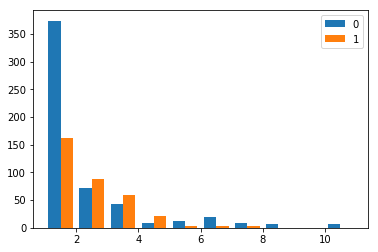

In [17]:
plt.hist([train.family_size[train.Survived==0],train.family_size[train.Survived==1]],label=[0,1])
plt.legend()

In [18]:
train.groupby('family_size').Survived.mean()

family_size
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

同乗家族の人数が１～３人の人は生存率が高いといえる

## Fare

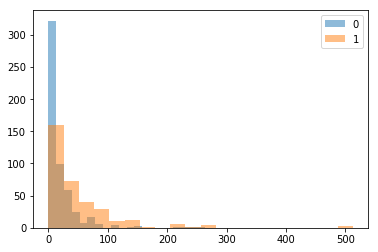

In [19]:
plt.hist(train.Fare[train.Survived==0],alpha=0.5,label=0,bins=20)
plt.hist(train.Fare[train.Survived==1],alpha=0.5,label=1,bins=20)
plt.legend()

Fareが高い方が生存率が高そうである。

In [20]:
#Fareの欠損値をtrainデータの中央値で埋める
all_data.Fare[all_data.Fare.isnull()] = train.Fare.median()

C:\Users\shunsuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Cabin

In [21]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

Cabinの最初の一文字は階層を表しているようである。

In [22]:
cabin_first = train.Cabin.map(lambda x:str(x)[0])

In [23]:
train.Survived.groupby(cabin_first).agg(['mean','size'])

,mean,size
Cabin,,
A,0.466667,15
B,0.744681,47
C,0.593220,59
D,0.757576,33
E,0.750000,32
F,0.615385,13
G,0.500000,4
T,0.000000,1
n,0.299854,687


階層によって生存率が違うし、欠損している人たちの生存率は低そうである。

In [24]:
all_data['Cabin_class'] = all_data.Cabin.map(lambda x:str(x)[0])
np.sort(all_data.Cabin_class.unique())

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'n'], dtype=object)

testデータだけに存在する客室の階層はない。

## Embarked

In [25]:
train.groupby('Embarked').Survived.agg(['mean','size'])

,mean,size
Embarked,,
C,0.553571,168
Q,0.389610,77
S,0.336957,644


C、Cherbourgで搭乗した客の生存率は良い。  
他の二つは全体の平均生存率と大きな差はない。

In [26]:
#欠損値を最頻値で埋める
all_data.Embarked.fillna(train.Embarked.mode()[0],inplace=True)

## Ticket

In [27]:
train.Ticket.sort_values().unique()

array(['110152', '110413', '110465', '110564', '110813', '111240',
       '111320', '111361', '111369', '111426', '111427', '111428',
       '112050', '112052', '112053', '112058', '112059', '112277',
       '112379', '113028', '113043', '113050', '113051', '113055',
       '113056', '113059', '113501', '113503', '113505', '113509',
       '113510', '113514', '113572', '113760', '113767', '113773',
       '113776', '113781', '113783', '113784', '113786', '113787',
       '113788', '113789', '113792', '113794', '113796', '113798',
       '113800', '113803', '113804', '113806', '113807', '11668', '11751',
       '11752', '11753', '11755', '11765', '11767', '11769', '11771',
       '11774', '11813', '11967', '12233', '12460', '12749', '13049',
       '13213', '13214', '13502', '13507', '13509', '13567', '13568',
       '14311', '14312', '14313', '14973', '1601', '16966', '16988',
       '17421', '17453', '17463', '17464', '17465', '17466', '17474',
       '17764', '19877', '19928', '19943

Ticketは数字だけのものと、アルファベット+数字のものが混在する。  
1文字目に注目して分類してみる。

In [28]:
train.groupby(train.Ticket.map(lambda x: str(x)[0])).Survived.agg(['mean','count'])

,mean,count
Ticket,,
1,0.630137,146
2,0.464481,183
3,0.239203,301
4,0.200000,10
5,0.000000,3
6,0.166667,6
7,0.111111,9
8,0.000000,2
9,1.000000,1


人数が多い文字に注目すると1,2,Pが生存率が高く逆に3,Aが生存率が低そうである。  
つぎにアルファベット部分を除いて数字だけに注目して分類してみた。

In [29]:
ticket_num = train.Ticket.str.extract('^(\d)|^\D.*\s(\d)\d*$').fillna(0).astype(int).sum(axis=1)

In [30]:
train.Survived.groupby(ticket_num).agg(['mean','count'])

,mean,count
0,0.250000,4
1,0.606061,231
2,0.408696,230
3,0.258856,367
4,0.133333,15
5,0.222222,9
6,0.071429,14
7,0.266667,15
8,0.000000,3
9,1.000000,3


人数が多い1,2,3の平均生存率は全体の平均値に近づいてしまった。  
1文字目が0のやつはTicketが'LINE'であり数字が一切ないもの。  
  
文字も含むか数字だけかどちらがいいのかは予測成績をみて決める。  
testデータにしか存在しない一文字目はない。

In [31]:
test.groupby(test.Ticket.map(lambda x: str(x)[0])).size()

Ticket
1     64
2     95
3    128
4      1
6      3
7      4
9      1
A     13
C     30
F      6
L      1
P     33
S     33
W      6
dtype: int64

In [32]:
all_data['Ticket_first_letter'] = all_data.Ticket.map(lambda x: str(x)[0])
all_data['Ticket_first_num'] = all_data.Ticket.str.extract('^(\d)|^\D.*\s(\d)\d*$').fillna(0).astype(int).sum(axis=1)

array([[1.        , 0.58251246],
       [0.58251246, 1.        ]])

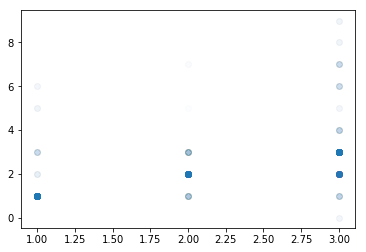

In [33]:
plt.scatter(all_data.Pclass,all_data.Ticket_first_num,alpha=0.01)
np.corrcoef(all_data.Pclass,all_data.Ticket_first_num)

Tiketの数字の１文字目はPclassと相関がありそう

## Name

In [34]:
train.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

familyname, honorific firstnameの順番にならんでいそう。  
familynameを使えば家族の紐づけが出来うる。  
honorificは性別や地位を表すから、年齢の穴埋めに利用。

In [35]:
#family_nameとhonorificを抽出
names = all_data.Name.str.extract('^(.*), (\w+)')
all_data['family_name'] = names.loc[:,0]
all_data['honorific'] = names.loc[:,1]

In [36]:
all_data.loc[:,['family_name','honorific']].head()

,family_name,honorific
0,Braund,Mr
1,Cumings,Mrs
2,Heikkinen,Miss
3,Futrelle,Mrs
4,Allen,Mr


### honorificの分析

In [37]:
#trainデータにおいてhonorificごとの生存率
all_data.iloc[:891,:].groupby('honorific').Survived.agg(['mean','size'])

,mean,size
honorific,,
Capt,0.000000,1
Col,0.500000,2
Don,0.000000,1
Dr,0.428571,7
Jonkheer,0.000000,1
Lady,1.000000,1
Major,0.500000,2
Master,0.575000,40
Miss,0.697802,182


honorificによって生存率に違いがある。  
testデータのhonorificも調べる。

In [38]:
all_data.iloc[891:,:].groupby('honorific').size()

honorific
Col         2
Dona        1
Dr          1
Master     21
Miss       78
Mr        240
Mrs        72
Ms          1
Rev         2
dtype: int64

人数の多いMaster.,Miss.,Mr.,Mrs.はそのままとする。  
それ以外は仕事を表す敬称と、貴族の尊称に分けてしまう。  
これによりテストデータにしかないDonaにも対応できる。

In [39]:
name_map={
    "Capt":        "Officer",
    "Col":         "Officer",
    "Major":       "Officer",
    "Jonkheer":    "Royalty",
    "Don":         "Royalty",
    "Sir" :        "Royalty",
    "Dr":          "Officer",
    "Rev":         "Officer",
    "the":         "Royalty",  #the Coutess
    "Dona":        "Royalty",
    "Mme":         "Mrs",
    "Mlle":        "Miss",
    "Ms":          "Mrs",
    "Mr" :         "Mr",
    "Mrs" :        "Mrs",
    "Miss" :       "Miss",
    "Master" :     "Master",
    "Lady" :       "Royalty"}
all_data.honorific.replace(name_map,inplace=True)

In [40]:
all_data.honorific.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer'], dtype=object)

In [41]:
all_data.groupby(['honorific','Sex']).Survived.agg(['mean','size'])

mean  size
honorific Sex                   
Master    male    0.575000    61
Miss      female  0.701087   262
Mr        male    0.156673   757
Mrs       female  0.795276   200
Officer   female  1.000000     1
          male    0.235294    22
Royalty   female  1.000000     3
          male    0.333333     3

敬称によって年齢の欠損値を補完する

In [42]:
all_data.groupby(['honorific','Sex']).Age.mean()

honorific  Sex   
Master     male       5.482642
Miss       female    21.795236
Mr         male      32.252151
Mrs        female    36.866279
Officer    female    49.000000
           male      46.142857
Royalty    female    40.000000
           male      42.333333
Name: Age, dtype: float64

In [43]:
def newage (cols):
    title=cols[0]
    Sex=cols[1]
    Age=cols[2]
    if pd.isnull(Age):
        if title=='Master' and Sex=="male":
            return 5.48
        elif title=='Miss' and Sex=='female':
            return 21.80
        elif title=='Mr' and Sex=='male': 
            return 32.25
        elif title=='Mrs' and Sex=='female':
            return 36.87
        elif title=='officer' and Sex=='female':
            return 49
        elif title=='Officer' and Sex=='male':
            return 46.14
        elif title=='Royalty' and Sex=='female':
            return 40
        else:
            return 42.33
    else:
        return Age 

In [44]:
all_data.Age = all_data[['honorific','Sex','Age']].apply(newage,axis=1)

### family_nameと家族の紐づけ

In [45]:
all_data.family_name.value_counts().head(10)

Andersson    11
Sage         11
Goodwin       8
Asplund       8
Davies        7
Smith         6
Skoog         6
Rice          6
Fortune       6
Johnson       6
Name: family_name, dtype: int64

In [46]:
all_data.query('family_name=="Andersson"')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,Cabin_class,Ticket_first_letter,Ticket_first_num,family_name,honorific
13,14,0.0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,7,n,3,3,Andersson,Mr
68,69,1.0,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,7,n,3,3,Andersson,Miss
119,120,0.0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S,7,n,3,3,Andersson,Miss
146,147,1.0,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S,1,n,3,3,Andersson,Mr
541,542,0.0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S,7,n,3,3,Andersson,Miss
542,543,0.0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S,7,n,3,3,Andersson,Miss
610,611,0.0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S,7,n,3,3,Andersson,Mrs
813,814,0.0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S,7,n,3,3,Andersson,Miss
850,851,0.0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S,7,n,3,3,Andersson,Master
1105,1106,NaN,3,"Andersson, Miss. Ida Augusta Margareta",female,38.0,4,2,347091,7.7750,NaN,S,7,n,3,3,Andersson,Miss


Anderssonさんは11人いるがこのうちどれが、家族なのだろう。  
family_sizeが1の単身者2人を除くと、後はみなfamily_sizeが7になっている。  
先にfamily_sizeの分布は確認したが、7人は大家族の部類になり珍しい。  
よってAnderssonさんはfamily_size=7の人たちが家族と考えた。

その他件数の多い姓を調べたが、単身者を除けば同じ姓の集団は家族と判断してもよさそうである。  

自分以外の家族の平均生存率を特徴量に加える。  
計算の都合上、Survivedデータのないテストデータについては、Survivedにtrainデータの平均生存率を先に入れた

In [47]:
def family_mean(series):
    others_survival = pd.Series([series.drop(i).mean() for i in series.index])
    
    return others_survival

In [48]:
all_data.Survived.fillna(mean_survival,inplace=True)

all_data['family_survival'] = all_data.query('family_size>1').groupby('family_name').Survived.transform(family_mean)
all_data['family_survival'].fillna(mean_survival,inplace=True)

# lightGBM

In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
import lightgbm as lgb
import optuna

## カテゴリデータのダミー化

In [50]:
all_data_one_hot = pd.get_dummies(all_data[['Survived','Pclass','Sex','Age','Fare','Embarked','family_size','Cabin_class',
                                            'Ticket_first_letter','family_survival']],
                                  columns=['Ticket_first_letter','Cabin_class','Sex','Pclass','Embarked'])

In [51]:
train = all_data_one_hot.iloc[:891]
test = all_data_one_hot.iloc[891:]

train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 38 columns):
Survived                 891 non-null float64
Age                      891 non-null float64
Fare                     891 non-null float64
family_size              891 non-null int64
family_survival          891 non-null float64
Ticket_first_letter_1    891 non-null uint8
Ticket_first_letter_2    891 non-null uint8
Ticket_first_letter_3    891 non-null uint8
Ticket_first_letter_4    891 non-null uint8
Ticket_first_letter_5    891 non-null uint8
Ticket_first_letter_6    891 non-null uint8
Ticket_first_letter_7    891 non-null uint8
Ticket_first_letter_8    891 non-null uint8
Ticket_first_letter_9    891 non-null uint8
Ticket_first_letter_A    891 non-null uint8
Ticket_first_letter_C    891 non-null uint8
Ticket_first_letter_F    891 non-null uint8
Ticket_first_letter_L    891 non-null uint8
Ticket_first_letter_P    891 non-null uint8
Ticket_first_letter_S    891 non-null uint8
Ticket_

In [52]:
train.head()

,Survived,Age,Fare,family_size,family_survival,Ticket_first_letter_1,Ticket_first_letter_2,Ticket_first_letter_3,Ticket_first_letter_4,Ticket_first_letter_5,...,Cabin_class_T,Cabin_class_n,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0.0,22.0,7.2500,2,0.000000,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
1,1.0,38.0,71.2833,2,0.383838,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2,1.0,26.0,7.9250,1,0.383838,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,1
3,1.0,35.0,53.1000,2,0.000000,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4,0.0,35.0,8.0500,1,0.383838,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1


## ハイパーパラメーターのチューニング

今回はoptunaというライブラリを用いて、learning_rate,num_leaves,min_child_samples,max_depthの調整をした。

In [51]:
def objective(trial):
    
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'learning_rate':trial.suggest_loguniform('learning_rate',0.01,0.05),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 60),
        'max_depth':trial.suggest_int('max_depth',3,8)
    }

    kf = KFold(n_splits=5,shuffle=True,random_state=1)

    accuracy_scores = []

    for train_index,valid_index in kf.split(train):
        X_train, X_valid = train.drop(columns='Survived').iloc[train_index],train.drop(columns='Survived').iloc[valid_index]
        y_train, y_valid = train.Survived.iloc[train_index],train.Survived.iloc[valid_index]

        #学習
        lgb_train = lgb.Dataset(X_train,y_train)
        gbm = lgb.train(params,lgb_train)

        #予測
        y_pred = np.round(gbm.predict(X_valid)).astype(int)
        accuracy_scores.append(accuracy_score(y_valid,y_pred))

    return np.mean(accuracy_scores)
study = optuna.create_study(direction='maximize',sampler=optuna.samplers.RandomSampler(seed=1))
optuna.logging.disable_default_handler()
study.optimize(objective, n_trials=100)

In [52]:
print('Number of finished trials: {}'.format(len(study.trials)))

print('Best trial:')
trial = study.best_trial
print('  Value: {}'.format(trial.value))
print('  Params: ')
for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.8440148138848785
  Params: 
    learning_rate: 0.027122545795644576
    num_leaves: 149
    min_child_samples: 13
    max_depth: 3


上記の最適化されたパラメータを使用する

In [53]:
params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt'
         }

params.update(trial.params)

## trainデータ内での交差検証

In [54]:
kf = KFold(n_splits=5,shuffle=True,random_state=6)

accuracy_scores = []

for train_index,valid_index in kf.split(train):
    X_train, X_valid = train.drop(columns='Survived').iloc[train_index],train.drop(columns='Survived').iloc[valid_index]
    y_train, y_valid = train.Survived.iloc[train_index],train.Survived.iloc[valid_index]

    #学習
    lgb_train = lgb.Dataset(X_train,y_train)
    gbm = lgb.train(params,lgb_train,num_boost_round=100)

    #予測
    y_pred = np.round(gbm.predict(X_valid)).astype(int)
    accuracy_scores.append(accuracy_score(y_valid,y_pred))

In [55]:
print(accuracy_scores)
print('CV平均:',np.mean(accuracy_scores))

[0.888268156424581, 0.8707865168539326, 0.7921348314606742, 0.8314606741573034, 0.848314606741573]
CV平均: 0.8461929571276128


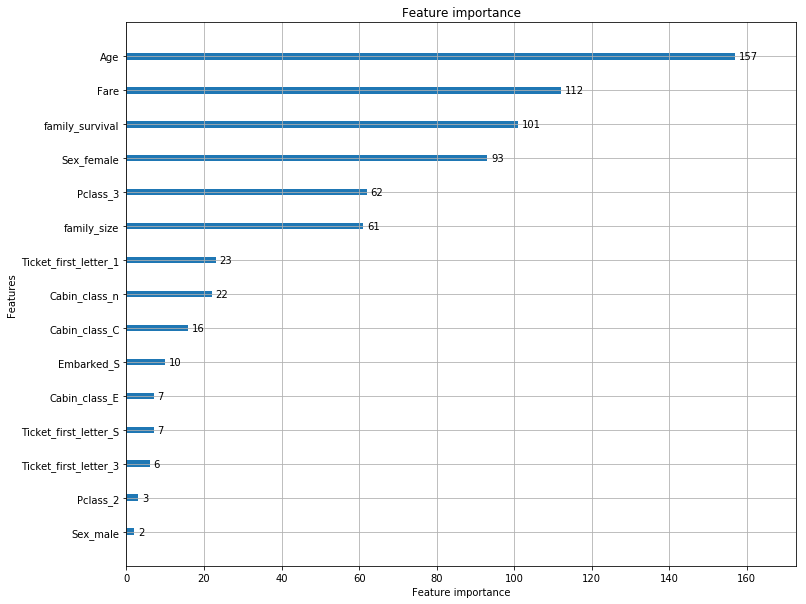

In [499]:
#重要な特徴量を表示
lgb.plot_importance(gbm,figsize=(12,10))

## testデータに対する予測

In [500]:
all_train_data = lgb.Dataset(train.drop(columns=['Survived']),label=train.Survived)

In [501]:
gbm_final = lgb.train(train_set=all_train_data,
                      params = params,
                      num_boost_round=100
                      )

In [489]:
y_pred = np.round(gbm_final.predict(test.drop(columns=['Survived']))).astype(int)

In [490]:
submission_df = pd.read_csv('gender_submission.csv')

In [491]:
submission_df['Survived'] = y_pred

In [492]:
from datetime import datetime, timedelta, timezone
JST = timezone(timedelta(hours=+9), 'JST')
ts = datetime.now(JST).strftime('%y%m%d%H%M')

submission_df.to_csv((ts+'lgb.csv'),index=False)

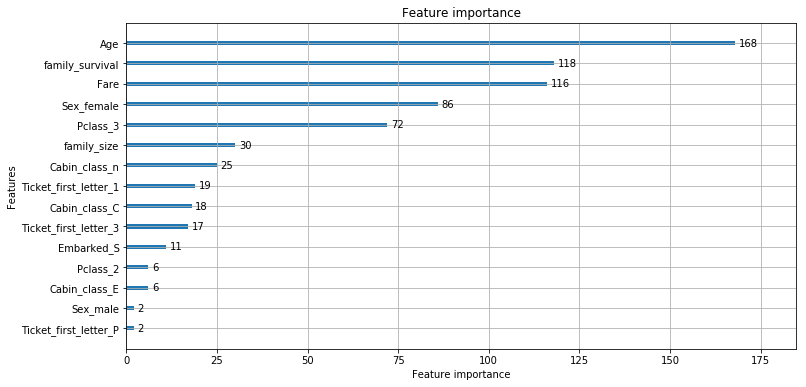

In [493]:
lgb.plot_importance(gbm_final, figsize=(12, 6))
plt.show()

これで提出するとスコアが0.77~0.80が出ました。  
optunaもランダムシードによって算出されるハイパーパラメータの値が変化するので、それによりスコアが変化しました。  
現在固定されているランダムシードで提出するとベストスコアの0.80382になります。

In [ ]:
kf = KFold(n_splits=5,shuffle=True,random_state=6)

mean_accuracy = {}
thresh_holds = np.arange(0.2,0.6,0.01)

for thresh_hold in thresh_holds:
    accuracy_scores = []
    for train_index,valid_index in kf.split(train):
        X_train, X_valid = train.drop(columns='Survived').iloc[train_index],train.drop(columns='Survived').iloc[valid_index]
        y_train, y_valid = train.Survived.iloc[train_index],train.Survived.iloc[valid_index]

    #学習
        lgb_train = lgb.Dataset(X_train,y_train)
        gbm = lgb.train(params,lgb_train,num_boost_round=100)

    #予測
        y_pred = np.where(gbm.predict(X_valid)<thresh_hold,0,1)
        accuracy_scores.append(accuracy_score(y_valid,y_pred))
    
    mean_accuracy[thresh_hold] = np.mean(accuracy_scores)

In [ ]:
mean_accuracy

In [62]:
thresh_holds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])